# refactoring Leaves + herbarium datasets.ipynb

Created On: Tuesday April 5th, 2022  
Created By: Jacob A Rose



Ideas:

* Add the 2 Herbarium 2022 image dataset root dirs to the catalog_registry?

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"


import pandas as pd
from pathlib import Path
from icecream import ic
from rich import print as pp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# from imutils.ml.data.datamodule import Herbarium2022DataModule, Herbarium2022Dataset
# from imutils.ml.utils.etl_utils import ETL
# import imutils

# import pytorch_lightning as pl
# from torchvision import transforms as T
# from hydra.experimental import compose, initialize, initialize_config_dir
# import hydra
# from omegaconf import DictConfig, OmegaConf
# from typing import *
# import torchmetrics

# from imutils.ml.models.pl import classifier
# from imutils.ml.utils.experiment_utils import configure_callbacks, configure_loggers, configure_trainer

In [9]:
ds = ExtantLeavesDataset()

ds.setup()

In [33]:
import imutils

from imutils.ml.data.datamodule import *

dm = ExtantLeavesDataModule(batch_size=32,
                            image_reader="PIL")
dm.setup()

self.transform_cfg:


{'preprocess': {'train': {'resize': 512}, 'val': {'resize': 256}, 'test': {'resize': 256}}, 
'batch_transform': {'train': {'random_resize_crop': 224}, 'val': {'center_crop': 224}, 
'test': {'center_crop': 224}}, 'normalize': [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]}

self.normalize: [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]
self.normalize: [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]
self.normalize: [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]


ic| subset: 'train'
    num_samples: 11797
    num_batches: 369
    self.num_classes: 94
    self.batch_size: 32
ic| subset: 'val'
    num_samples: 4720
    num_batches: 148
    self.num_classes: 94
    self.batch_size: 32
ic| subset: 'test'
    num_samples: 7079
    num_batches: 222
    self.num_classes: 94
    self.batch_size: 32


self.transform_cfg:


{'preprocess': {'train': {'resize': 512}, 'val': {'resize': 256}, 'test': {'resize': 256}}, 
'batch_transform': {'train': {'random_resize_crop': 224}, 'val': {'center_crop': 224}, 
'test': {'center_crop': 224}}, 'normalize': [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]}

self.normalize: [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]
self.normalize: [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]
self.normalize: [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]


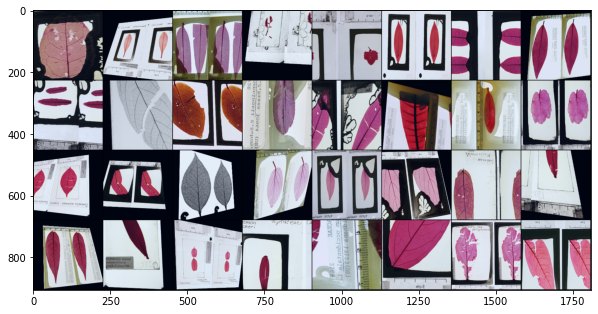

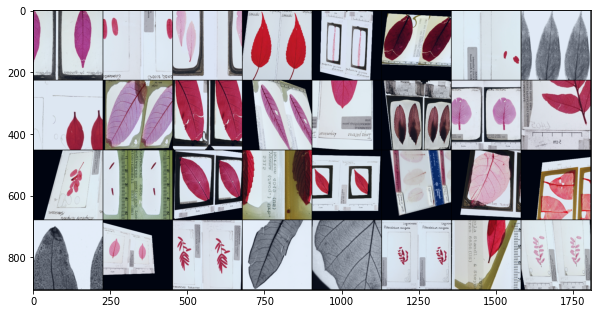

In [34]:
dm.show_batch()

In [ ]:


bsz = dm.batch_size		
imgs = [dm.train_dataset[i][0] for i in range(bsz)]

len(imgs)

imgs[0].shape

import torchvision
import matplotlib.pyplot as plt

grid_img = torchvision.utils.make_grid(imgs, nrow=8)

grid_img.shape

plt.imshow(grid_img.permute(1,2,0))

dm.train_transform

from imutils.catalog_registry import available_datasets
from rich import print as pp

# pp(available_datasets.search("512", version="v1_1"))
pp(available_datasets)

available_datasets.display_all()

In [19]:
splits = "0.5,0.2,0.3"

splits = tuple(float(frac) for frac in splits.split(","))
for s in splits:
    print(type(s), s)
print(splits)

<class 'float'> 0.5
<class 'float'> 0.2
<class 'float'> 0.3
(0.5, 0.2, 0.3)


In [16]:

import os
catalogs_root_dir = "/media/data_cifs/projects/prj_fossils/users/jacob/data/leavesdb-v1_1"

sorted(os.listdir(catalogs_root_dir))

['.ipynb_checkpoints',
 'Extant_Leaves',
 'Extant_Leaves_1024',
 'Extant_Leaves_512',
 'Extant_Leaves_family_100_1024',
 'Extant_Leaves_family_100_512',
 'Extant_Leaves_family_10_1024',
 'Extant_Leaves_family_10_512',
 'Extant_Leaves_family_3_1024',
 'Extant_Leaves_family_3_512',
 'Fossil_1024',
 'Fossil_512',
 'Fossil_family_3_1024',
 'Fossil_family_3_512',
 'Fossils',
 'PNAS_family_100_1024',
 'PNAS_family_100_512']

In [13]:
from imutils.big.common_catalog_utils import ImageFileDatasetConfig, CSVDatasetConfig

In [14]:
CSVDatasetConfig.full_name

In [11]:
data_config = ImageFileDatasetConfig(base_dataset_name="Herbarium2022",
                                     class_type = "family",
                                     threshold = None,
                                     resolution = 512,
                                     version = "third_party",
                                     path_schema = None) #"{family}_{genus}_{species}_{collection}_{catalog_number}")

In [8]:
data_config = ImageFileDatasetConfig(base_dataset_name="Extant_Leaves",
                                     class_type = "family",
                                     threshold = 10,
                                     resolution = 512,
                                     version = "v1_1",
                                     path_schema = "{family}_{genus}_{species}_{collection}_{catalog_number}")

In [8]:
pp(data_config)

print(data_config)



In [16]:
os.listdir('/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize-512')

['train_images',
 'test_images',
 'train_metadata.csv',
 'test_metadata.csv',
 '.ipynb_checkpoints',
 'catalogs']